In [136]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt
import csv

In [129]:
X_train = np.load("./data_given/X_train.npy")
X_test = np.load("./data_given/X_test.npy")
y_train = np.load("./data_given/y_train.npy")

In [130]:
model = YOLO("./make_dice_img/runs/detect/train1000_100/weights/best.pt") #学習したmodelを読み込み

In [131]:
def count_num_white_pixels(img):
    img_r = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_r_uint8 = (img_r).astype(np.uint8)  # 0-1 の浮動小数点数を 0-255 の整数に変換
    ret, th = cv2.threshold(img_r_uint8, 0, 255, cv2.THRESH_OTSU)
    num_255s = np.count_nonzero(th == 255) # 白
    return num_255s

In [132]:
def validation():
    names=model.names
    num_train_img = X_train.shape[0]//100
    correct = 1
    errors = []
    for idx_train_img in range(num_train_img):
        X_train_1 = X_train[idx_train_img].reshape(20, 20)
        img = np.stack((X_train_1.copy(),)*3, axis=-1)
        pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
        resized_img = pil_img.resize((80, 80))
        num_white_pixels = count_num_white_pixels(np.array(resized_img))

        n_objects = 0
        if num_white_pixels < 1200:
            n_objects = 1
        elif num_white_pixels < 2000:
            n_objects = 2
        else:
            n_objects = 3

        resize_flag = 0
        if resize_flag:
            pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
            resized_img = pil_img.resize((80, 80))
            img = np.array(resized_img)
        preds = model.predict(img,conf=0.1)
        sum_dice = 0
        num_dice = 0
        true_value = y_train[idx_train_img:idx_train_img+1][0]
        sorted_boxes = sorted(preds[0].boxes, key=lambda x: x.conf, reverse=True)
        top_n_boxes = sorted_boxes[:n_objects]
        for box in top_n_boxes:
            label=names[box.cls.cpu().numpy()[0]]
            dice_num = int(label[-1])
            sum_dice += dice_num
            num_dice += 1
        if sum_dice == true_value:
            correct += 1
        else:
            errors.append([idx_train_img, sum_dice, true_value, num_dice, n_objects, num_white_pixels])
    print(correct)
#validation()
#print(errors)

In [137]:
def calculate_dice_submit(X_test, model):
    sum_dice_values = []
    names=model.names
    num_test_img = X_test.shape[0]
    for idx_test_img in range(num_test_img):
        X_train_1 = X_train[idx_test_img].reshape(20, 20)
        img = np.stack((X_train_1.copy(),)*3, axis=-1)
        pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
        resized_img = pil_img.resize((80, 80))
        num_white_pixels = count_num_white_pixels(np.array(resized_img))

        n_objects = 0
        if num_white_pixels < 1200:
            n_objects = 1
        elif num_white_pixels < 2000:
            n_objects = 2
        else:
            n_objects = 3

        resize_flag = 0
        if resize_flag:
            pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
            resized_img = pil_img.resize((80, 80))
            img = np.array(resized_img)
        preds = model.predict(img,conf=0.1)
        sum_dice = 0
        num_dice = 0
        sorted_boxes = sorted(preds[0].boxes, key=lambda x: x.conf, reverse=True)
        top_n_boxes = sorted_boxes[:n_objects]
        for box in top_n_boxes:
            label=names[box.cls.cpu().numpy()[0]]
            dice_num = int(label[-1])
            sum_dice += dice_num
            num_dice += 1
        sum_dice_values.append(sum_dice)
    return sum_dice_values

def write_to_csv(file_name, sum_dice_values):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        for i, sum_dice in enumerate(sum_dice_values):
            writer.writerow([i, sum_dice])

sum_dice_values = calculate_dice_submit(X_test, model)
write_to_csv("output.csv", sum_dice_values)

#validation()
#print(errors)

1515


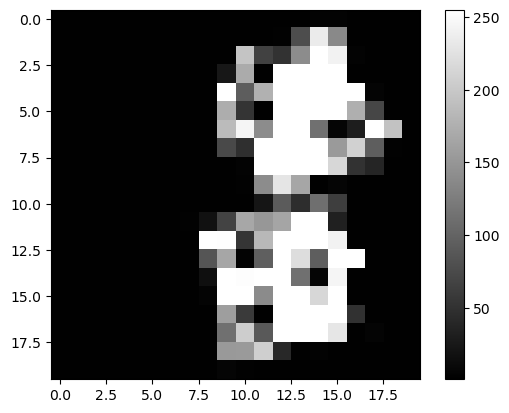

In [134]:
i = 1995
X_train_1 = X_train[i:i+1, :].reshape(20, 20)
img = np.stack((X_train_1.copy(),)*3, axis=-1)
pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
resized_img = pil_img.resize((80, 80))
num_white_pixels = count_num_white_pixels(np.array(resized_img))
print(num_white_pixels)


img = np.stack((X_train_1.copy(),)*3, axis=-1)
pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
resized_img = pil_img.resize((80, 80))
resized_img_np = np.array(resized_img)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()